<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/Fastai_without_tags_RVLCDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook

In [3]:
#hide
from fastbook import *
from IPython.display import display, HTML

In [4]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#path = '/content/drive/.shortcut-targets-by-id/1-qv-5jmPjOBKOLQl9B6mzvygl_RQ_Y7l/RVL_CDIP/labels/'
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_train = pd.read_csv(path + 'train.csv', delimiter=',', error_bad_lines=False)

In [8]:
df_train['text'].replace(np.nan, '-', inplace=True)

In [9]:
df_train.tail(10)

,path,label,text
319989,imagesu/u/q/n/uqn92e00/2048471973.tif,12,"Announcing an important new program for convenience store operators NSCS. “It's the Law: Responsible Tobacco Retailing Program"" ‘This kit contains important information and materials to ensure the continued legal sales of tobacco to your stores' customers. The enclosed materials are samples of the available materials to communicate the legal sale message to your employees and customers. The Responsible Tobacco Retailing Program includes: @ ‘It's the Law* Button @ ‘It's the Law’ Certification Brochure ‘it’s the Law"" Door/Window decal lt ‘It's the Law’ Window/Merchandiser decal i ‘it's the L..."
319990,imagest/t/k/e/tke15c00/2073514459.tif,8,2073514459
319991,imagesv/v/j/n/vjn28c00/507398111+-8113.tif,3,pepe i+ + blip jth oe Gore Lyrepreyee re rg ad “yd Page WID prarnrs Sanoy v2v0 aensyrg vesenind reepand soa oy a - ECE nye Grinp 91) Day RoS aad ub Emyows go adhe grypy ep warps of Ay) FL ee caw gn | pained aod yt PAD fag 1118 6ezos roy Sue boey AWVE0C_ \
319992,imagesm/m/d/a/mda38e00/1005090491.tif,15,"Cates 4 Dagcerk 20 Pom apn TL: 4 Confidential ~ cpa - 9/13/77 Vor, I To: James Bowling From: Stanley Sco i Subject: ACS Task Forces on Tobseco and Cancer-~Draft Ro} ed a pr nary+-confidential first draft—— Yeingarten's National Conmission on Smoking and Our contact has ree! report from Victor Public Policy. Se : ha While the first draft report""does not include restrictive legislation,"" it is proposing governnent intervention in a number of areas to regulate the “unregulated multi-billion dollar tobacco industry."" 2 While “recognizing the right of adults to sm this initial roport makes 20 h..."
319993,imagesp/p/h/b/phb54c00/80701874.tif,11,o0*00%%e | INa¥YAD | | doro0%ee | 00°009 awl ow] aaaor Sn NOLONIHSYH Swo1waint 12x22 006 SAVO OC LaN Swuas Gey TITEOD | LNAWALVLS/39IOANI > -LNBW3LVLS/ 39IOANI 6TOOT *A°N Axy0K H3N BONIAY HLdT4 999 3IAY3S VIOIW 3WOH 40. Ino ‘ouv71 409 0002 205(212) 91001 -:N “HOA MAN anNSAW NOSIOFA SL ‘ouy ‘Buisneapy ysued jeuoyeN
319994,imagesu/u/p/p/upp04f00/0000282789.tif,9,"oo.) TULSA: TRIBUNE Z Inconsistencies Cited Other Side of Smoking Fight 1 Ai Sent the Tobacco In-* age today atthe Hikon In."" and geoge Sata aaa, aad | EES RGee es ead pa on Goria eg: Meaty ee Se Sea ree fovea cecimetre Sean ae : ‘one rail, fad Dr Gitert = THE BRITISH smoke for about a many i ed the Americar ‘tinat ect Rae SE Dra"
319995,imagesa/a/c/z/acz60f00/0011972032.tif,15,"BROWN & WILLIAMSON TOBACCO CORPORATION RESEARCH & DEVELOPMENT INTERNAL CORRESPONDENCE Ti bs Fy Liteinger p! FROM: -K. A. Legrand DATE: August 17, 1987 SUBJECT: IN-HOUSE SENSORY EVALUATION OF DAP/CLUCOSE REACTION MIXTURE PRODUCTS /399 OBJECTIVE The objective of this study was to evaluate the effect of DAP-Clucose reaction product as a casing ingredient and determine how it affects taste and irritation. The in-house nonmenthol panel evaluated the following cigarettes in Paired attribute testing for impact, irritation, tobacco taste, overall taste, mouthful of smoke, off-taste, and preference..."
319996,imagesu/u/j/m/ujm20a00/10155388.tif,6,"Who Chooses Prepaid Medical Care: Survey Results from Two Marketings of Three New Prepayment Plans LAUS J ROGHMANN, PD. WLLIAM AVETT PR, ANDREW. SORENSEN PHO SANDRA WELLS, BA and RGAARD WERSINGER MA MAJOR SEDICAL EXPENSES, especially those for hogptalisations. are now widely ‘covered through prepaid insurance. Ine Rochester area the eal Blue (Gross-Ble Shield (BC-BS) plan provides insurance (or rmore than 90 percent of the working population. In ‘omast to thi sucess of hospital insurance, prepaid troup practice plans, covenng arbulatory cae aswell, -have only slowly found acceptance arnong..."
319997,imagesd/d/r/r/drr93f00/0000343578.tif,9,"20 poyouse 20472: ‘Fupyotue vod oy pop “ag, Aq, uoanam “Kpmr “rpuRgeny AUEIOWE-UOE Uy ae , som ery £q sp OWA spiro yonw ¥ < pies owexespt sou jeonewoyie ""yp E ge aanuooq plyeau] a398 Boopy2009 , 690136252"
319998,imagesp/p

In [10]:
#path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_test = pd.read_csv(path + 'test.csv', delimiter=',', error_bad_lines=False)

In [ ]:
df_test.head(10)

In [12]:
df_test.shape, df_train.shape

((39998, 3), (319999, 3))

In [13]:
df_val = pd.read_csv(path + 'val.csv', delimiter=',', error_bad_lines=False)

In [14]:
df_val.head()

,path,label,text
0,imagesi/i/y/k/iyk38c00/512015827+-5827.tif,0,"Fi J Reynolds Tobacee Cory January 22, 1990 Dear Fellow Employee: You no doubt heard over the weekend thal we have deckied to cancel our Philadelphia test market of Uptown Cigarettes, {regret not informing you about this decision before we told the news media, but the decision was made late Friday evening. and because of the enormous media attention focused on the product. was important that we immediately made our decision public. ur intentions in bringing Uptown to market in Philadelphia have been flagrantly misrepresented by our ‘opponents. Our sole purpose was simply to test market a c..."
1,imagesr/r/r/e/rre21e00/87103403.tif,0,"MICROBIOLOGICAL ASSOCIATES INC ‘CORPORATE OFFICES 15221 River Road » Bethesda © Maryland 20816-1493 (801) 654.3400 Telex 90-8793 March 25, 1987 Dr. Thomas A. Vollmuth Lorillard Research Center 420 English Street P.O, Box 21688 Greensboro, North Carolina 27420 Dear Tom, I forgot to discuss the prices for the SCE studies in the letters that were attached with the protocols. The retest of cigarettes D33, D34 and D36 (Study I-5045.013.001) will cost $21,000. This study will use common control groups (both Reference, sham and cyclophosphamide) from the parallel study (1-7010.013). The numbers o..."
2,imagesk/k/s/u/ksu44c00/03636607.tif,4,"ovacco roan (Chawwet Jo) Broadcast April 17, 1979 Editorial Director Bernadette Phillips Presented by: Norman Davis, Area Vice President robacco smoke is more than just very irritating to some people -- smoking is hazardous to your health =~ and the health of many non-smokers caught downwind from an inconsiderate smoker. But we think the anti-smoking ordinance now smoldering in Dade County is even more dangerous to the healthy functioning of democracy. Because of this we urge a,vote against the ordinance on May 8. the “clean indoor air” ordinance that will be put to Dade voters in less tha..."
3,imagesr/r/a/i/rai09d00/50437856-7857.tif,14,"Una S. Ryan Professor of Medicine December 18, 1941. Bristol University, Bristol, England B.Sc 1963 Zoology, Chemistry and Microbiology Cambridge University, Cambridge, England Ph.D. 1968 Gell Biology 1967 ~ 1971 Director, Laboratory for Ultrastructure studies, Howard Hughes Medical Institute, Miami, Florida 1972 - 1977 Assistant Professor of Medicine, University of Miami School of Medicine, Miami, Florida 1977 - 1980 Associate Professor of Medicine, University of Miami School of Medicine, Miami, Florida 1980 - 1986 Research Professor of Medicine, University of Miami School of Medicine, Mi..."
4,imagesd/d/q/j/dqj13f00/0000457436.tif,12,-DRAPT- MANUFACTURING QUALITY PRODUCTS Prepared by Marcel A. Hamann Quality Assurance Department Brown & Williamson Tobacco Corporation Wovember 1989 681001023


## Create DataLoader

In [15]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['label']

In [16]:
df_train.keys()

Index(['path', 'label', 'text'], dtype='object')

In [ ]:
#df_train = df_train[0:10000] 

In [17]:
dblock_train = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['text', 'label'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dls = dblock_train.dataloaders(df_train, bs=64)
dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxfld 1 - xxrep 4 — _ xxup xxunk xxmaj wah 95 seme of xxmaj congress wring for xxunk ion , # lie - xxunk xxunk une xxmaj aly lucky wo draw a sal group for pro conference , xxmaj yet whea xxmaj rep ” xxmaj mike xxmaj xxunk . a xxmaj democrat fom xxmaj oh falled ) oe xxunk , be xxunk 2d xxunk and about 70 repos “ tae xxunk vas xxmaj yo announce rein : troduction ia the “ new xxmaj congres of ‘ xxunk xxmaj bul to ban ‘ all adversing of ‘ bacco products cluding even win dow xxunk by sores tat sol them , xxunk timed ihe xxunk for he day ler a meeting of ihe xxmaj american xxmaj bat ‘ xxunk in xxmaj new xxmaj oren because be ‘ ie xxunk 10 be able to announce ‘ xxunk ‘ xxunk of his",9
1,"xxbos xxfld 1 ‘ xxunk ( xxunk exposure ) . xxmaj al xxunk xxmaj there 1 no offical xxunk xxunk level xxunk of carson xxunk is 2 pom xxunk ai xxunk - as me : xxmaj xxunk xxunk . xxunk xxunk ( criteria lor » xxmaj xxunk xxmaj standard , xxmaj xxunk xxmaj exposure xxmaj we xxmaj xxunk xxmaj xxunk , xxup niosh , xxmaj de- enim 1878 ) xxmaj second the carbon xxunk found i xxmaj string s waters reports 4800 poh ‘ shich xxunk is not 2400 times the rec ‘ xxunk av standard lor occupational expo- ute , whichis 2 ppm 2 xxrep 3 0 ppd ) xxmaj we are conducting 8 limited environ rental ‘ and heath xxunk inthe xxmaj toone , xxmaj tenn .. area in xxmaj connection with our study of wastewater xxunk ‘ ant plant workers in nearby xxmaj memphis , whe workers",9


## Classification Model

In [18]:
from fastai.text.all import *

In [19]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [20]:
learn.fine_tune(1, 2e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,1.008232,0.459538,0.134533,0.865467,1.583342,12:29


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.017255,0.000035,0.000016,0.999984,1.000035,31:35


In [21]:
learn.show_results()

,text,category,category_
0,"xxbos xxfld 1 xxmaj me xxmaj xxunk ot al / xxup febs xxmaj lier 38 ( 198 ) 201 - 205 halothane ( 9 ) . and possibly from the carcinogenic effects ofthe xxunk activated by xxup xxunk , ‘ as xxup cyp2a6 is responsible for xxmaj c : oxidation which is the major metabolic pathway of nicotine ( 15.40 ) , xxmaj xxunk and co - workers [ 41 ] xxunk that lack of xxup xxunk would affect smoking behaviour . xxmaj it was shown , that xxunk subjects carrying defective xxup xxunk alleles were found among smokers as compared to non - smokers and they also provided evidence that smokers xxunk a defective xxup xxunk allele smoked in general sx eer cigarettes per day . xxmaj because this study used the old genotyping method , it can not ‘ oe excluded that some individuals were xxunk and that",6,6
1,"xxbos xxfld 1 ° xxup the xxup new xxup york xxup times xxup s. xxmaj new xxmaj york , xxmaj new xxmaj york “ april 15 , 1966 2 xxup xxunk xxunk © xxup by xxup tax xxup officials xxunk xxunk xxmaj smuggling xxmaj from xxmaj south to xxmaj evade xxmaj local xxmaj xxunk 82 ° "" xxmaj by xxup martin xxup arnold | xxup baltimore , xxmaj april 4 — xxmaj or- xxunk crime ‘ xxunk are ‘ apparently taking over . the sy xxunk cigarette business , tax ss xxunk sald here today . xxmaj indications of the organized xxunk of the smuggling , mostly ‘ from xxmaj north xxmaj carolina , were noted in the speed with which xxunk legal help is provided jo for arrested smugglers . and : an xxmaj increase in the xxunk xxup s55 ‘ of state cigarette - tax stamps . xxmaj",9,9
2,"xxbos xxfld 1 xxmaj ns xxmaj classified xxunk xxrep 4 e ae oe xxup xxunk xxup advertisements ww xxunk the xxunk of tha xxunk . xxmaj rate : 1 xxmaj size xxmaj xxunk year , per word $ 0 . 6 times fa cone xxmaj gea yet , per word 448 % 15 times in contact xxup sbs xxmaj pb xxmaj fe , 20 . tee i xxunk yen , xxup bot ora $ 4 . or and mumber couse for a xxmaj xxunk xxmaj pose xxunk xxunk for 2 words . xxunk xxunk , xxmaj full xxunk must accompany , your xxmaj xxunk xxmaj adder : xxmaj xxunk ” xxmaj department , xxmaj wea xxmaj xxunk 488 xxmaj xxunk xxmaj ave , xxmaj net , xxmaj nat . 10028 . ‘ schools xxup xxunk xxup to xxup type & 4 weeks , xxmaj xxunk ia 6 ‘ recta :",4,4
3,"xxbos xxfld 1 xxmaj diversification in the tobacco industry xxmaj the following able representa xxunk tothe xxunk profiles of the six xxmaj american cigarette manufacturers published xxmaj inthe xxmaj december 1983 xxrep 3 s ue of the xxmaj new xxmaj york xxmaj state xxmaj journal of xxmaj medicine ( 63 : 1328 - 1332 ) and xxunk xxmaj the xxmaj cigarete xxmaj under . world xxmaj secaucus , xxmaj ni , xxmaj lyle xxmaj stuart , 1985 ) , xxmaj the caries tables at . the subsidiaries , xxup us xxunk brands , xxunk themes . ad ‘ xxunk agencies , and sponsorships and promotions . xxmaj als noted vere figures on overall advertising expenditures , ‘ cigaretes ate by far the mos advertised prot in soir . xxmaj more than xxunk lon i peat cach year inthe xxup us by the tobacco companies to promote cigarette smoking . xxmaj",9,9
4,"xxbos xxfld 1 xxup r.j . mcdonald “ neutrophil xxmaj elastase xxmaj augments xxmaj acute xxmaj xxunk xxmaj injury in xxmaj isolated xxmaj rat xxmaj lungs xxmaj perfused with xxmaj neutrophil xxmaj xxunk * xxup ruth xxup j. xxup mcdonald , xxup linda xxup v. xxup xxunk , and xxup john xxup e. xxup repine xxmaj neutrophils and neutrophil - derived toxic 0 ; ‘ metabolites appear to contribute to several forms of acute tung injury , including the xxmaj adult xxmaj respiratory xxmaj distress xxmaj syndrome ( ards ) . xxmaj toxic ‘ xxunk from neutrophils also partici : pate in animal and isolated perfused tung . ‘ models of acute lung injury ( 1 - 3 ) . xxmaj this pression is based on findings that neutrophil depletion or xxup o ; metabolite scavenger treat- ‘ ment reduces ing injury in various intact an imal models of lung",6,6
5,"xxbos xxfld 1 em xxunk . 0 - 60 1 iss te sae eran xxmaj biochemical 

In [23]:
learn.save('text_classification_stags')

Path('models/text_classification_stags.pth')

In [24]:
# load model
learn = learn.load('text_classification_stags')

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.029397,0.000201,0.000047,0.999953,1.000201,31:29
1,0.017368,0.000087,0.000016,0.999984,1.000087,31:31


SuggestedLRs(valley=0.0002290867705596611)

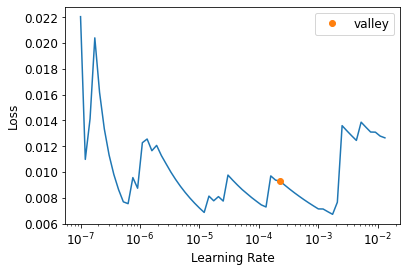

In [26]:
learn.unfreeze()
learn.lr_find()

In [27]:
learn_lm = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [28]:
learn_lm.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.961871,0.408532,0.119486,0.880514,1.504608,12:32


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.020051,0.000111,0.000031,0.999969,1.000111,31:34
1,0.013370,0.000027,0.000016,0.999984,1.000027,31:35


##Validation

In [ ]:
#df_test = df_test[0:3000]

In [30]:
# create dataloader of test
dblock_test = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test.dataloaders(df_test, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [31]:
df_test.shape

(39998, 3)

In [32]:
test_dl = dloader_test.test_dl(df_test['text'])

In [33]:
preds = learn_lm.get_preds(dl=test_dl, with_decoded=True)

In [34]:
len(preds)

3

In [35]:
learn_lm.validate()

(#4) [2.6544117645244114e-05,1.5625244486727752e-05,0.9999843835830688,1.0000265836715698]

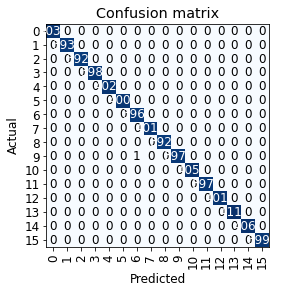

In [36]:
interp = ClassificationInterpretation.from_learner(learn_lm)
interp.plot_confusion_matrix()